<a href="https://colab.research.google.com/github/yauheniyakarabliova/Mathshub/blob/main/Titanic_prediction_by_KNN_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset overview

In [14]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
#unzip dataset archive
! unzip ./titanic.zip

Archive:  ./titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [16]:
#read train data
data = pd.read_csv('./train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

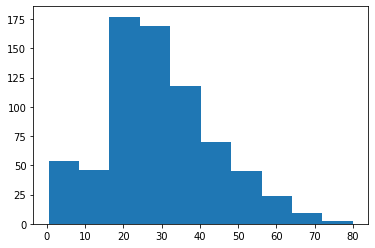

In [23]:
plt.hist(data["Age"])

# Train and test devision



In [65]:
y = data['Survived']
x = data.drop(columns=['PassengerId', 'Survived'])

In [66]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [73]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 47 to 740
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Name      179 non-null    object 
 2   Sex       179 non-null    object 
 3   Age       133 non-null    float64
 4   SibSp     179 non-null    int64  
 5   Parch     179 non-null    int64  
 6   Ticket    179 non-null    object 
 7   Fare      179 non-null    float64
 8   Cabin     36 non-null     object 
 9   Embarked  178 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 15.4+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdba82ce510>,
      dtype=object)

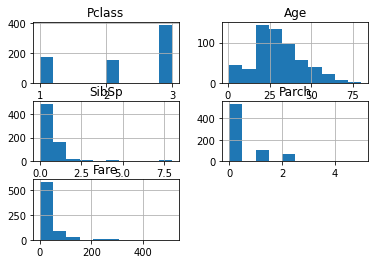

In [69]:
x_train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdba801a690>,
      dtype=object)

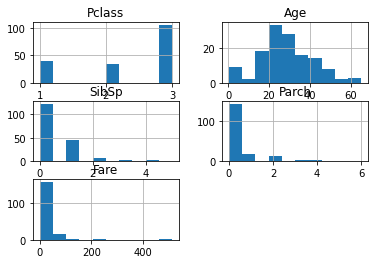

In [70]:
x_val.hist()

In [71]:
np.unique(y_train, return_counts = True)

(array([0, 1]), array([430, 282]))

In [72]:
np.unique(y_val, return_counts = True)

(array([0, 1]), array([119,  60]))

# Data preparation

In [32]:
x_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
66,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
433,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
881,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
70,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S
121,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S


In [38]:
#delete unnecessary columns
#x_train = x_train.drop(columns = ['Name', 'Ticket','Cabin'])
x_train = x_train.drop(columns = ['Cabin'])

In [39]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
66,2,female,29.0,0,0,10.5000,S
433,3,male,17.0,0,0,7.1250,S
881,3,male,33.0,0,0,7.8958,S
70,2,male,32.0,0,0,10.5000,S
121,3,male,NaN,0,0,8.0500,S


In [ ]:
#fill in empty data


In [40]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 66 to 399
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       574 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


It's more reasonable to fill in empty data using mediana value. Mean value is more sensitive in case of errors in dataset (too big or too small values, so called выбросы) 

In [41]:
#fill in Age empty fields with madiana value of Age column
median_age = x_train['Age'].median()
x_train['Age'] = x_train['Age'].fillna(median_age)

In [42]:
x_train.info() #all column values now are not-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 66 to 399
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [43]:
#check the most popular value for Embarked field, as this field is not number, it doesn't have mediana, so we will use the ,ost popular instead
x_train["Embarked"].value_counts()

S    516
C    138
Q     58
Name: Embarked, dtype: int64

In [44]:
most_common_value = x_train['Embarked'].value_counts().index[0]
x_train['Embarked'] = x_train['Embarked'].fillna(most_common_value)

In [45]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 66 to 399
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB



# Convert category values into number values

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le_embarked = LabelEncoder()
le_embarked.fit(x_train['Embarked'])
le_embarked.classes_

array(['C', 'Q', 'S'], dtype=object)

In [49]:
x_train["Embarked"] = le_embarked.transform(x_train['Embarked'])

In [52]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
66,2,female,29.0,0,0,10.5000,2
433,3,male,17.0,0,0,7.1250,2
881,3,male,33.0,0,0,7.8958,2
70,2,male,32.0,0,0,10.5000,2
121,3,male,28.0,0,0,8.0500,2


In [53]:
le_sex = LabelEncoder()
le_sex.fit(x_train['Sex'])
le_sex.classes_


array(['female', 'male'], dtype=object)

In [54]:
x_train['Sex'] = le_sex.transform(x_train['Sex'])

In [55]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
66,2,0,29.0,0,0,10.5000,2
433,3,1,17.0,0,0,7.1250,2
881,3,1,33.0,0,0,7.8958,2
70,2,1,32.0,0,0,10.5000,2
121,3,1,28.0,0,0,8.0500,2


In [56]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 66 to 399
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


# KNN model learning

In [57]:
#import library
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)

In [59]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

# Prepare validation and test part of the dataset

In [74]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 47 to 740
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Name      179 non-null    object 
 2   Sex       179 non-null    object 
 3   Age       133 non-null    float64
 4   SibSp     179 non-null    int64  
 5   Parch     179 non-null    int64  
 6   Ticket    179 non-null    object 
 7   Fare      179 non-null    float64
 8   Cabin     36 non-null     object 
 9   Embarked  178 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 15.4+ KB


In [75]:
#prepare val data
#remove columns
x_val = x_val.drop(columns=['Name', 'Ticket', 'Cabin'])
#fill in empty data for Age and Embarked columns
x_val['Age'] = x_val['Age'].fillna(median_age)
x_val['Embarked'] = x_val['Embarked'].fillna(most_common_value)
#convert category values into numbers (Embarked and Sex)
x_val['Sex'] = le_sex.transform(x_val['Sex'])
x_val['Embarked'] = le_embarked.transform(x_val['Embarked'])

In [76]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 47 to 740
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 11.2 KB


In [77]:
#test data preparation
x_test = pd.read_csv('./test.csv')
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
test_passenger_id = x_test['PassengerId']

In [79]:
#remove columns
x_test = x_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
#fill in empty data for Age and Embarked columns
x_test['Age'] = x_test['Age'].fillna(median_age)
x_test['Embarked'] = x_test['Embarked'].fillna(most_common_value)
#convert category values into numbers (Embarked and Sex)
x_test['Sex'] = le_sex.transform(x_test['Sex'])
x_test['Embarked'] = le_embarked.transform(x_test['Embarked'])

In [80]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [81]:
"""
there is additional empty value in test data, comparing to train data
therefore we need to replace the empty value in test by mediana taken from train data
"""
median_fare = x_train['Fare'].median()
x_test["Fare"] = x_test['Fare'].fillna(median_fare)

In [82]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


# KNN model test